# Exploring all data from a tissue¶

## Learning about the lung data in the Census

In [1]:
import cellxgene_census
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

In [2]:
census = cellxgene_census.open_soma()

The "stable" release is currently 2023-05-15. Specify 'census_version="2023-05-15"' in future calls to open_soma() to ensure data consistency.


In [3]:
census

<Collection 's3://cellxgene-data-public/cell-census/2023-05-15/soma/' (open for 'r') (2 items)
    'census_info': 's3://cellxgene-data-public/cell-census/2023-05-15/soma/census_info' (unopened)
    'census_data': 's3://cellxgene-data-public/cell-census/2023-05-15/soma/census_data' (unopened)>

In [4]:
summary_table = census["census_info"]["summary_cell_counts"].read().concat().to_pandas()

In [5]:
summary_table.head()

,soma_joinid,organism,category,ontology_term_id,unique_cell_count,total_cell_count,label
0,0,Homo sapiens,all,na,33758887,53794728,na
1,1,Homo sapiens,assay,EFO:0008722,264166,279635,Drop-seq
2,2,Homo sapiens,assay,EFO:0008780,25652,51304,inDrop
3,3,Homo sapiens,assay,EFO:0008913,133511,133511,single-cell RNA sequencing
4,4,Homo sapiens,assay,EFO:0008919,89477,206754,Seq-Well


In [6]:
summary_table.query("organism == 'Homo sapiens' & category == 'tissue_general' & label =='lung'")

,soma_joinid,organism,category,ontology_term_id,unique_cell_count,total_cell_count,label
986,986,Homo sapiens,tissue_general,UBERON:0002048,2907927,5975910,lung


### Learning about cells of lung data

In [7]:
lung_obs = (
    census["census_data"]["homo_sapiens"]
    .obs.read(value_filter="tissue_general == 'lung' and is_primary_data == True")
    .concat()
    .to_pandas()
)

In [8]:
lung_obs.head()

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,is_primary_data,self_reported_ethnicity,self_reported_ethnicity_ontology_term_id,sex,sex_ontology_term_id,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id
0,1263240,9f222629-9e39-47d0-b83f-e08d610c7479,10x 3' v2,EFO:0009899,native cell,CL:0000003,unknown,unknown,normal,PATO:0000461,...,True,unknown,unknown,unknown,unknown,cell,lung,UBERON:0002048,lung,UBERON:0002048
1,1263243,9f222629-9e39-47d0-b83f-e08d610c7479,Drop-seq,EFO:0008722,ciliated columnar cell of tracheobronchial tree,CL:0002145,57-year-old human stage,HsapDv:0000151,pulmonary fibrosis,MONDO:0002771,...,True,unknown,unknown,male,PATO:0000384,cell,lung,UBERON:0002048,lung,UBERON:0002048
2,1263245,9f222629-9e39-47d0-b83f-e08d610c7479,10x 3' transcription profiling,EFO:0030003,"CD8-positive, alpha-beta T cell",CL:0000625,unknown,unknown,squamous cell lung carcinoma,MONDO:0005097,...,True,unknown,unknown,unknown,unknown,cell,lung,UBERON:0002048,lung,UBERON:0002048
3,1263249,9f222629-9e39-47d0-b83f-e08d610c7479,10x 3' v2,EFO:0009899,"CD4-positive, alpha-beta T cell",CL:0000624,unknown,unknown,lung adenocarcinoma,MONDO:0005061,...,True,unknown,unknown,unknown,unknown,cell,lung,UBERON:0002048,lung,UBERON:0002048
4,1263258,9f222629-9e39-47d0-b83f-e08d610c7479,10x 3' v2,EFO:0009899,"CD8-positive, alpha-beta T cell",CL:0000625,unknown,unknown,lung adenocarcinoma,MONDO:0005061,...,True,unknown,unknown,unknown,unknown,cell,lung,UBERON:0002048,lung,UBERON:0002048


#### Datasets

In [9]:
census_datasets = (
    census["census_info"]["datasets"]
    .read(column_names=["collection_name", "dataset_title", "dataset_id", "soma_joinid"])
    .concat()
    .to_pandas()
)

In [10]:
census_datasets = census_datasets.set_index("dataset_id")

In [11]:
census_datasets.head()

,collection_name,dataset_title,soma_joinid
dataset_id,,,
9d8e5dca-03a3-457d-b7fb-844c75735c83,Abdominal White Adipose Tissue,22 integrated samples,0
a6388a6f-6076-401b-9b30-7d4306a20035,A spatially resolved single cell genomic atlas...,scRNA-seq data - myeloid cells,1
842c6f5d-4a94-4eef-8510-8c792d1124bc,A spatially resolved single cell genomic atlas...,scRNA-seq data - all cells,2
74520626-b0ba-4ee9-86b5-714649554def,A spatially resolved single cell genomic atlas...,scRNA-seq data - T cells,3
396a9124-fb20-4822-bf9c-e93fdf7c999a,A spatially resolved single cell genomic atlas...,scRNA-seq data - B cells,4


In [12]:
dataset_cell_counts = pd.DataFrame(lung_obs[["dataset_id"]].value_counts())

In [13]:
dataset_cell_counts = dataset_cell_counts.rename(columns={0: "cell_counts"})

In [14]:
dataset_cell_counts = dataset_cell_counts.merge(census_datasets, on="dataset_id")

In [15]:
dataset_cell_counts

,cell_counts,collection_name,dataset_title,soma_joinid
dataset_id,,,,
1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1,1028006,High-resolution single-cell atlas reveals dive...,The single-cell lung cancer atlas (LuCA) -- ex...,283
9f222629-9e39-47d0-b83f-e08d610c7479,784630,The integrated Human Lung Cell Atlas,An integrated cell atlas of the human lung in ...,12
f7c1c579-2dc0-47e2-ba19-8165c5a0e353,217738,A human cell atlas of fetal gene expression,Survey of human embryonic development,452
d8da613f-e681-4c69-b463-e94f5e66847f,116313,A molecular single-cell lung atlas of lethal C...,A molecular single-cell lung atlas of lethal C...,41
576f193c-75d0-4a11-bd25-8676587e6dc2,90384,HTAN MSK - Single cell profiling reveals novel...,Combined samples,346
d41f45c1-1b7b-4573-a998-ac5c5acb1647,82991,HTAN MSK - Transcriptional connectivity of reg...,Transcriptional connectivity of regulatory T c...,14
3dc61ca1-ce40-46b6-8337-f27260fd9a03,71752,A human fetal lung cell atlas uncovers proxima...,All cells,294
8c42cfd0-0b0a-46d5-910c-fc833d83c45e,60993,A molecular cell atlas of the human lung from ...,"Krasnow Lab Human Lung Cell Atlas, 10X",561
2672b679-8048-4f5e-9786-f1b196ccfd08,57019,"scRNA-seq assessment of the human lung, spleen...",Lung Parenchyma,385


#### Assays

In [16]:
lung_obs[["assay"]].value_counts()

assay                                   
10x 3' v2                                   1236968
10x 3' v3                                    702845
10x 5' v1                                    262323
sci-RNA-seq                                  217738
BD Rhapsody Whole Transcriptome Analysis     122902
10x 3' transcription profiling                97432
Drop-seq                                      65220
single cell library construction              58981
10x 5' v2                                     41852
microwell-seq                                 33698
Smart-seq2                                    25662
inDrop                                        25652
10x 3' v1                                      8638
Seq-Well                                       8016
dtype: int64

#### Disease

In [17]:
lung_obs[["disease"]].value_counts()

disease                              
normal                                   1164582
lung adenocarcinoma                       772120
COVID-19                                  331019
squamous cell lung carcinoma              209675
non-small cell lung carcinoma             120796
chronic obstructive pulmonary disease      55254
pulmonary fibrosis                         51343
interstitial lung disease                  45714
pulmonary emphysema                        32065
pneumonia                                  31923
small cell lung carcinoma                  31540
lung large cell carcinoma                  21167
cystic fibrosis                            17590
lymphangioleiomyomatosis                   12374
pleomorphic carcinoma                      10765
dtype: int64

#### Sex

In [18]:
lung_obs[["sex"]].value_counts()

sex    
male       1402940
female     1123386
unknown     381601
dtype: int64

#### Cell vs nucleus

In [19]:
lung_obs[["suspension_type"]].value_counts()

suspension_type
cell               2469358
nucleus             438569
dtype: int64

#### Cell types

In [20]:
lung_obs[["cell_type"]].value_counts().head(20)

cell_type                                      
alveolar macrophage                                291507
native cell                                        263362
CD4-positive, alpha-beta T cell                    211456
CD8-positive, alpha-beta T cell                    189471
macrophage                                         154415
type II pneumocyte                                 129234
epithelial cell of lower respiratory tract         105090
classical monocyte                                 102303
natural killer cell                                 95953
T cell                                              92846
stromal cell                                        87714
B cell                                              81125
malignant cell                                      75917
plasma cell                                         64551
epithelial cell                                     59353
fibroblast                                          45305
capillary endothelial ce

#### Sub-tissues

In [21]:
lung_obs[["tissue"]].value_counts()

tissue                   
lung                         2576327
lung parenchyma               147410
alveolus of lung               54856
lingula of left lung           35284
upper lobe of right lung       32099
lower lobe of left lung        17854
right lung                     12880
upper lobe of left lung        10113
left lung                       9276
lower lobe of right lung        7981
middle lobe of right lung       3847
dtype: int64

### Learning about genes of lung data

In [22]:
lung_var = census["census_data"]["homo_sapiens"].ms["RNA"].var.read().concat().to_pandas()

In [23]:
lung_var

,soma_joinid,feature_id,feature_name,feature_length
0,0,ENSG00000243485,MIR1302-2HG,1021
1,1,ENSG00000237613,FAM138A,1219
2,2,ENSG00000186092,OR4F5,2618
3,3,ENSG00000238009,RP11-34P13.7,3726
4,4,ENSG00000239945,RP11-34P13.8,1319
...,...,...,...,...
60659,60659,ENSG00000288719,RP4-669P10.21,4252
60660,60660,ENSG00000288720,RP11-852E15.3,7007
60661,60661,ENSG00000288721,RP5-973N23.5,7765
60662,60662,ENSG00000288723,RP11-553N16.6,1015


In [24]:
presence_matrix = cellxgene_census.get_presence_matrix(census, "Homo sapiens", "RNA")

In [25]:
presence_matrix = presence_matrix[dataset_cell_counts.soma_joinid, :]

In [26]:
presence_matrix.sum(axis=1).A1

array([17811, 50259, 44150, 34265, 22447, 23642, 26347, 20921, 24672,
       27705, 27243, 26323, 27181, 23203, 57042, 32610, 29620, 26454,
       23705, 38676, 47307, 21641, 23740, 22552, 20594, 19952],
      dtype=uint64)

In [27]:
genes_measured = presence_matrix.sum(axis=1).A1

In [28]:
dataset_cell_counts["genes_measured"] = genes_measured

In [29]:
dataset_cell_counts

,cell_counts,collection_name,dataset_title,soma_joinid,genes_measured
dataset_id,,,,,
1e6a6ef9-7ec9-4c90-bbfb-2ad3c3165fd1,1028006,High-resolution single-cell atlas reveals dive...,The single-cell lung cancer atlas (LuCA) -- ex...,283,17811
9f222629-9e39-47d0-b83f-e08d610c7479,784630,The integrated Human Lung Cell Atlas,An integrated cell atlas of the human lung in ...,12,50259
f7c1c579-2dc0-47e2-ba19-8165c5a0e353,217738,A human cell atlas of fetal gene expression,Survey of human embryonic development,452,44150
d8da613f-e681-4c69-b463-e94f5e66847f,116313,A molecular single-cell lung atlas of lethal C...,A molecular single-cell lung atlas of lethal C...,41,34265
576f193c-75d0-4a11-bd25-8676587e6dc2,90384,HTAN MSK - Single cell profiling reveals novel...,Combined samples,346,22447
d41f45c1-1b7b-4573-a998-ac5c5acb1647,82991,HTAN MSK - Transcriptional connectivity of reg...,Transcriptional connectivity of regulatory T c...,14,23642
3dc61ca1-ce40-46b6-8337-f27260fd9a03,71752,A human fetal lung cell atlas uncovers proxima...,All cells,294,26347
8c42cfd0-0b0a-46d5-910c-fc833d83c45e,60993,A molecular cell atlas of the human lung from ...,"Krasnow Lab Human Lung Cell Atlas, 10X",561,20921
2672b679-8048-4f5e-9786-f1b196ccfd08,57019,"scRNA-seq assessment of the human lung, spleen...",Lung Parenchyma,385,24672


In [30]:
var_somaid = np.nonzero(presence_matrix.sum(axis=0).A1 == presence_matrix.shape[0])[0].tolist()

In [31]:
lung_var = lung_var.query(f"soma_joinid in {var_somaid}")

In [32]:
lung_var.head()

,soma_joinid,feature_id,feature_name,feature_length
15,15,ENSG00000177757,FAM87B,1947
18,18,ENSG00000230368,FAM41C,1971
23,23,ENSG00000187634,SAMD11,4172
24,24,ENSG00000188976,NOC2L,5540
25,25,ENSG00000187961,KLHL17,3402


## Fetching all single-cell human lung data from the Census¶

In [33]:
lung_cell_subsampled_n = 100000

In [34]:
lung_cell_subsampled_ids = lung_obs["soma_joinid"].sample(lung_cell_subsampled_n, random_state=1).tolist()

In [35]:
lung_gene_ids = lung_var["soma_joinid"].to_numpy()

In [36]:
lung_adata = cellxgene_census.get_anndata(
    census,
    organism="Homo sapiens",
    obs_coords=lung_cell_subsampled_ids,
    var_coords=lung_gene_ids,
)

In [37]:
lung_adata.var_names = lung_adata.var["feature_name"]

In [38]:
lung_adata

AnnData object with n_obs × n_vars = 100000 × 11493
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length'

In [39]:
census.close()
del census

## Calculating QC metrics of the lung data¶

### Top genes per cell

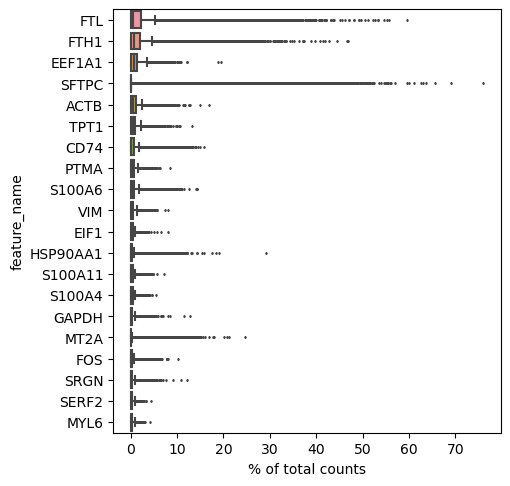

In [40]:
sc.pl.highest_expr_genes(lung_adata, n_top=20)

### Number of sequenced genes by assay

In [41]:
sc.pp.calculate_qc_metrics(lung_adata, percent_top=None, log1p=False, inplace=True)

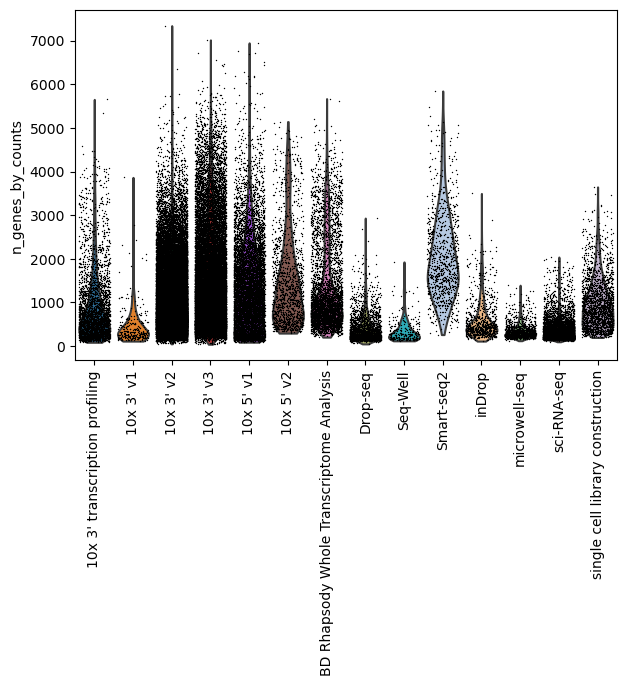

In [42]:
sc.pl.violin(lung_adata, "n_genes_by_counts", groupby="assay", jitter=0.4, rotation=90)

### Total counts by assay

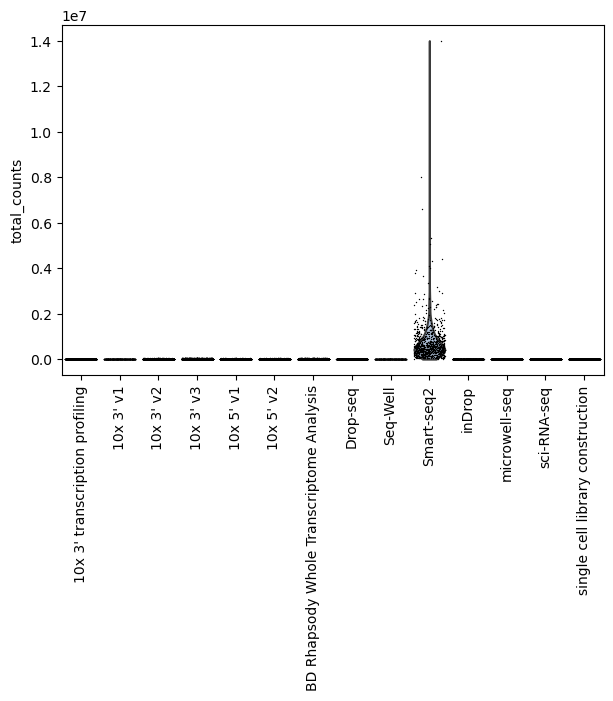

In [43]:
sc.pl.violin(lung_adata, "total_counts", groupby="assay", jitter=0.4, rotation=90)

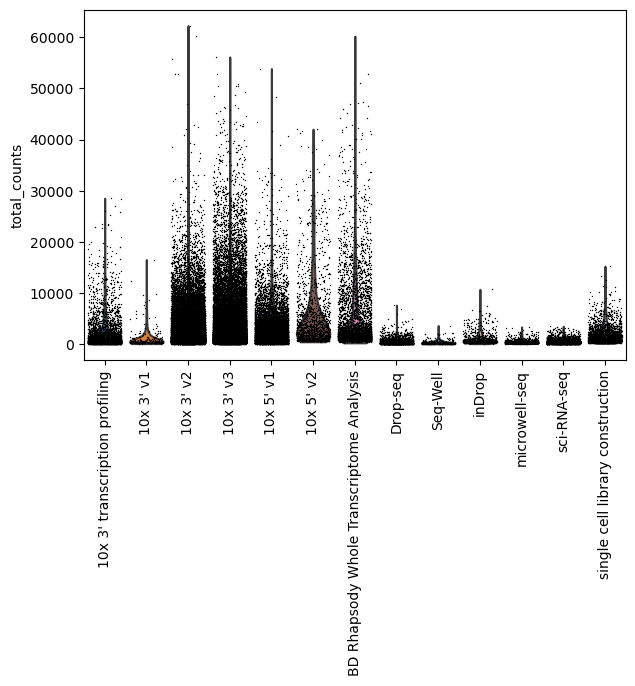

In [44]:
sc.pl.violin(
    lung_adata[lung_adata.obs["assay"] != "Smart-seq2",],
    "total_counts",
    groupby="assay",
    jitter=0.4,
    rotation=90,
)

## Creating a normalized expression layer and embeddings

In [45]:
lung_adata = lung_adata[lung_adata.obs["assay"] != "Smart-seq2",].copy()

In [46]:
lung_adata.layers["counts"] = lung_adata.X

In [47]:
sc.pp.normalize_total(lung_adata, target_sum=1e4)

In [48]:
sc.pp.log1p(lung_adata)

In [49]:
sc.pp.highly_variable_genes(lung_adata, n_top_genes=500, flavor="seurat_v3", layer="counts")

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [50]:
lung_adata = lung_adata[:, lung_adata.var.highly_variable]

In [51]:
sc.pp.scale(lung_adata, max_value=10)

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [52]:
sc.tl.pca(lung_adata)

In [53]:
sc.pp.neighbors(lung_adata)

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/

In [54]:
sc.tl.umap(lung_adata)

In [55]:
n_cell_types = len(lung_adata.obs["cell_type"].drop_duplicates())

In [56]:
from random import randint

In [57]:
colors = []

for i in range(len(lung_adata.obs["cell_type"].drop_duplicates())):
    colors.append("#%06X" % randint(0, 0xFFFFFF))

In [58]:
lung_adata

AnnData object with n_obs × n_vars = 99107 × 500
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'n_genes_by_counts', 'total_counts'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'assay_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


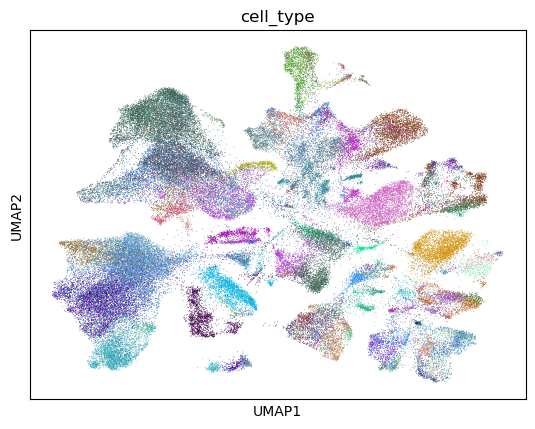

In [59]:
sc.pl.umap(lung_adata, color="cell_type", palette=colors, legend_loc=None)

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


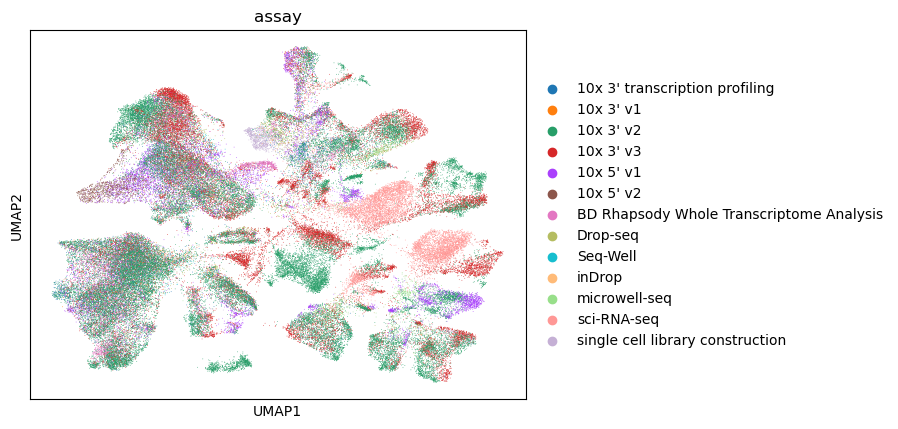

In [60]:
sc.pl.umap(lung_adata, color="assay")

In [61]:
top_cell_types = lung_adata.obs["cell_type"].value_counts()

In [62]:
top_cell_types.reset_index().head(20)

,index,cell_type
0,alveolar macrophage,10097
1,native cell,9016
2,"CD4-positive, alpha-beta T cell",6966
3,"CD8-positive, alpha-beta T cell",6284
4,macrophage,5357
5,type II pneumocyte,4452
6,epithelial cell of lower respiratory tract,3667
7,classical monocyte,3596
8,natural killer cell,3325
9,T cell,3172


In [63]:
top_cell_types = list(top_cell_types.reset_index().head(20)["index"])

In [64]:
top_cell_types

['alveolar macrophage',
 'native cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'macrophage',
 'type II pneumocyte',
 'epithelial cell of lower respiratory tract',
 'classical monocyte',
 'natural killer cell',
 'T cell',
 'stromal cell',
 'B cell',
 'malignant cell',
 'plasma cell',
 'epithelial cell',
 'fibroblast',
 'ciliated columnar cell of tracheobronchial tree',
 'capillary endothelial cell',
 'regulatory T cell',
 'CD1c-positive myeloid dendritic cell']

In [65]:
lung_adata_top_cell_types = lung_adata[[i in top_cell_types for i in lung_adata.obs["cell_type"]], :]

In [66]:
lung_adata_top_cell_types

View of AnnData object with n_obs × n_vars = 75039 × 500
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'n_genes_by_counts', 'total_counts'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'assay_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [67]:
lung_adata_top_cell_types.obs["cell_type"].value_counts().reset_index()

,index,cell_type
0,alveolar macrophage,10097
1,native cell,9016
2,"CD4-positive, alpha-beta T cell",6966
3,"CD8-positive, alpha-beta T cell",6284
4,macrophage,5357
5,type II pneumocyte,4452
6,epithelial cell of lower respiratory tract,3667
7,classical monocyte,3596
8,natural killer cell,3325
9,T cell,3172


In [68]:
lung_adata_top_cell_types.obs["assay"].value_counts().reset_index()

,index,assay
0,10x 3' v2,31521
1,10x 3' v3,18722
2,sci-RNA-seq,6533
3,10x 5' v1,6047
4,BD Rhapsody Whole Transcriptome Analysis,3437
5,10x 3' transcription profiling,2940
6,single cell library construction,1741
7,Drop-seq,1634
8,10x 5' v2,778
9,inDrop,697


/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


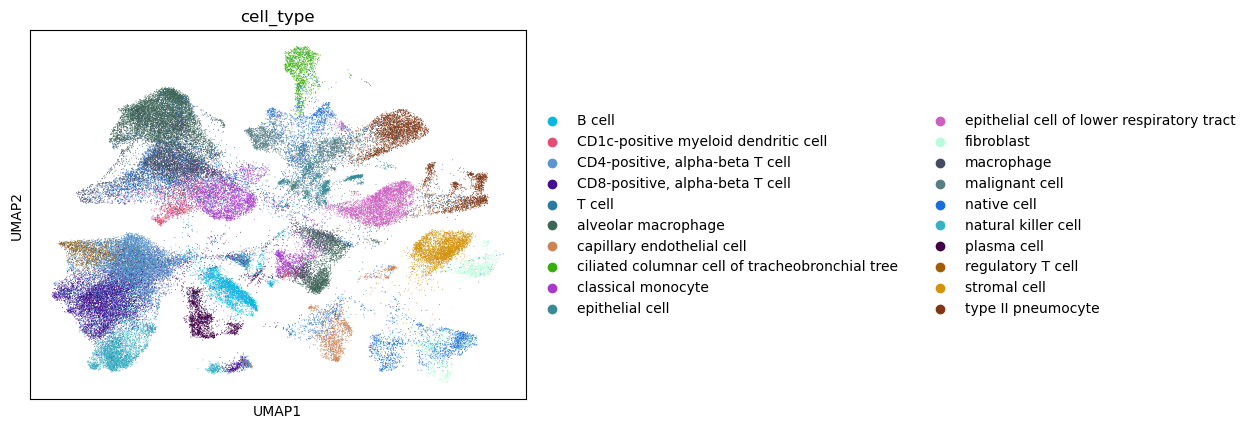

In [69]:
sc.pl.umap(lung_adata_top_cell_types, color="cell_type")

/Users/tomoya/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


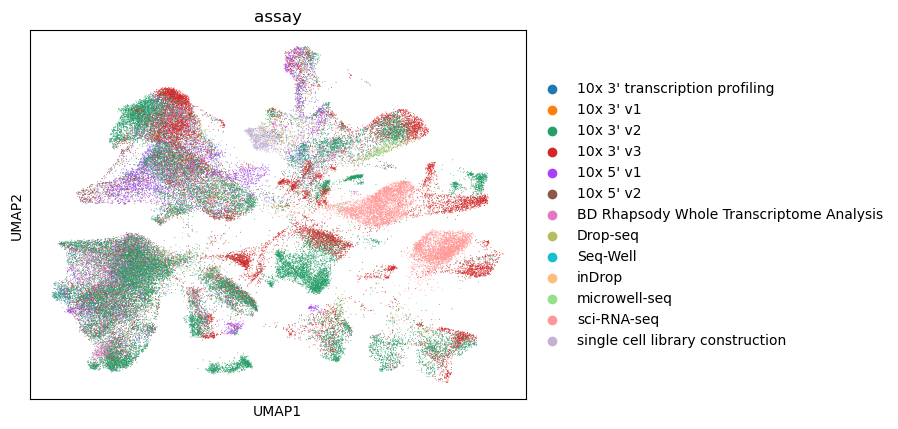

In [70]:
sc.pl.umap(lung_adata_top_cell_types, color="assay")